<center><h1>UCCD2063 Artificial Intelligence Techniques</h1></center>
<center><h2>Trimester June 2024</h2></center>
<hr>

<h2>Group Assignment (Group 43)</h2>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import urllib.request
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## 2.1 Data Description

In [6]:
#Load dataset.csv and read the first 5 items of the dataset
data = pd.read_csv('dataset.csv')
data.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [7]:
#Show the name of the columns, Dtype and Non-null Count
data.info()
print(f'\nColumn names:\n{data.columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

## 2.2 Data Exploration and Visualization

In [8]:
# Understanding the dataset's structure and dimensions
print(f'Dataset shape:\n{data.shape}')
print(f'\nColumn names:\n{data.columns}')
print()

#Shows the statistics of all numerical attributes in the dataset
data.describe()

Dataset shape:
(2100, 18)

Column names:
Index(['Gender', 'Age', 'Height(cm)', 'Weight(kg)', 'Family_history',
       'Alcohol', 'Junk_food', 'Vege_day', 'Meals_day', 'Snack', 'Smoking',
       'Water_intake(L)', 'Transportation', 'Exercise', 'TV', 'Income',
       'Discipline', 'Cardiovascular_risk(y)'],
      dtype='object')



,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


In [9]:
#Shows the sum of null value for each column
#print(f'Number of Null value in each column in dataset: \n\n{data.isnull().sum()}')


## 2.2.1 Data visualization for Numeric Value Attributes


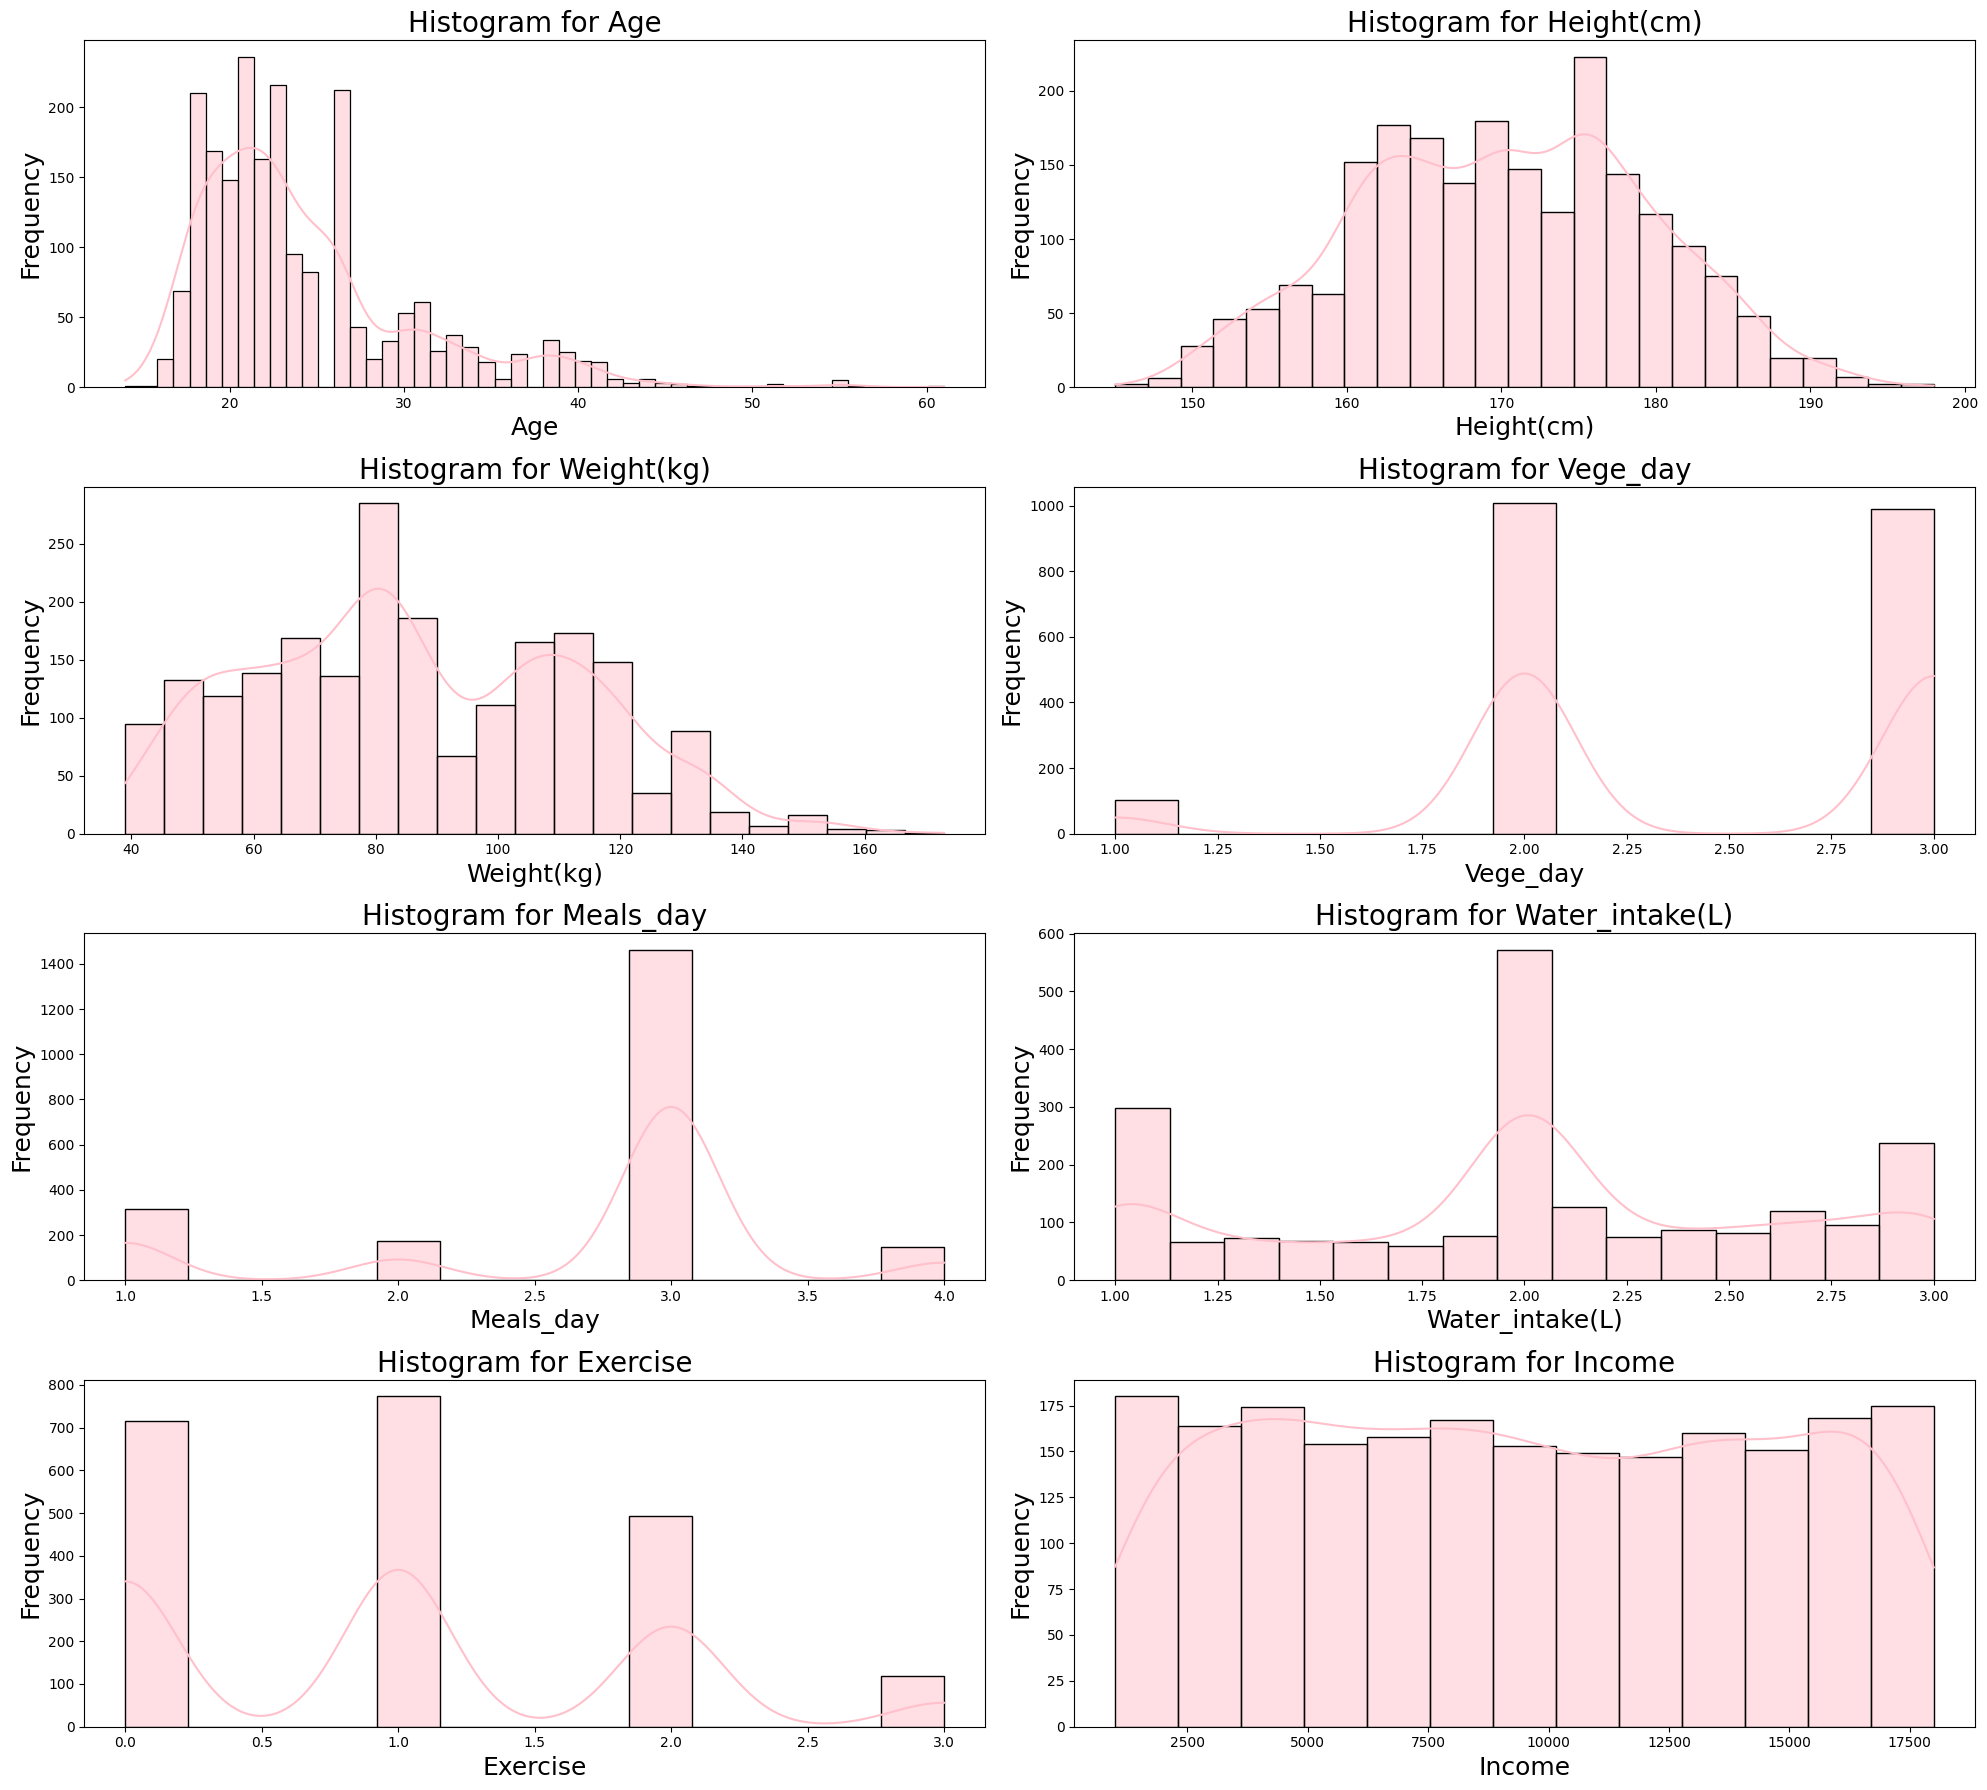

In [10]:
# List of numeric columns
numeric_columns =['Age', 'Height(cm)', 'Weight(kg)','Vege_day', 'Meals_day', 'Water_intake(L)','Exercise','Income']

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through the numeric columns and create a subplot for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)  # Adjust number of rows/columns depending on the number of plots
    sns.histplot(data[column], kde=True, color='pink')
    plt.title(f'Histogram for {column}', size=20)
    plt.xlabel(column, size=18)
    plt.ylabel('Frequency', size=18)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [11]:
# List of categorial columns
categorial_col = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation','TV', 'Discipline', 'Cardiovascular_risk(y)']

#examine the distribution of categories using value counts for categorial data
for column in categorial_col:
    counts = data[column].value_counts()
    print(counts)
    print('------------------------------')


Gender
Male      1060
Female    1040
Name: count, dtype: int64
------------------------------
Family_history
yes    1715
no      385
Name: count, dtype: int64
------------------------------
Alcohol
low       1394
none       635
medium      70
high         1
Name: count, dtype: int64
------------------------------
Junk_food
yes    1855
no      245
Name: count, dtype: int64
------------------------------
Snack
Sometimes     1754
Frequently     242
Always          53
No              51
Name: count, dtype: int64
------------------------------
Smoking
no     2056
yes      44
Name: count, dtype: int64
------------------------------
Transportation
bus           1573
car            454
walk            56
motorcycle      11
bicycle          6
Name: count, dtype: int64
------------------------------
TV
rare        947
moderate    910
often       243
Name: count, dtype: int64
------------------------------
Discipline
no     2004
yes      96
Name: count, dtype: int64
------------------------------

In [12]:
num_att = ['Age', 'Height(cm)', 'Weight(kg)','Vege_day', 'Meals_day', 'Water_intake(L)','Exercise','Income']
cat_att = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation','TV', 'Discipline', 'Cardiovascular_risk(y)']

## 2.3 Data Pre-processing

In [13]:
#Split the output vector from the input matrix
X=data.drop('Cardiovascular_risk(y)',axis=1)
y=data['Cardiovascular_risk(y)']

In [14]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)
print('full set shape=',X.shape)
print('train shape=',X_train.shape)
print('test shape=',X_test.shape)

full set shape= (2100, 17)
train shape= (1680, 17)
test shape= (420, 17)


In [15]:
# Split the input matrix into numerical and categorical sets
num_att = ['Age', 'Height(cm)', 'Weight(kg)','Vege_day', 'Meals_day', 'Water_intake(L)','Exercise','Income']
cat_att = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation','TV', 'Discipline']
X_train_num=X_train.drop(cat_att,axis=1)
X_train_cat=X_train[cat_att]

print('X_train_num shape=',X_train_num.shape)
print('X_train_cat shape=',X_train_cat.shape)

X_train_num shape= (1680, 8)
X_train_cat shape= (1680, 9)


In [16]:
# Identify the number of missing values for numerical sets
X_train_num.isnull().sum()

Age                0
Height(cm)         0
Weight(kg)         0
Vege_day           0
Meals_day          0
Water_intake(L)    0
Exercise           0
Income             0
dtype: int64

In [17]:
# Identify the number of missing values categorical sets
X_train_cat.isnull().sum()

Gender            0
Family_history    0
Alcohol           0
Junk_food         0
Snack             0
Smoking           0
Transportation    0
TV                0
Discipline        0
dtype: int64

In [18]:
# Impute missing values for categorical columns in X_train_cat
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='most_frequent')
X_train_cat_tr=imputer.fit_transform(X_train_cat)

In [19]:
# Standard scaling for numerical features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train_num)
X_train_num_tr=scaler.transform(X_train_num)
X_test_num= scaler.transform(X_test[num_att])

In [20]:
# Standard scaling for numerical features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train_num)
X_train_num_tr=scaler.transform(X_train_num)
X_test_num= scaler.transform(X_test[num_att])

In [22]:
# Encode categorical features
X_train_cat_tr = pd.get_dummies(X_train_cat, drop_first=True)
X_test_cat_encoded = pd.get_dummies(X_test[cat_att], drop_first=True)

In [23]:
# Check for missing values in the encoded data
X_train_cat_tr = X_train_cat_tr.values
missing_values = np.isnan(X_train_cat_tr)
print("Number of missing values:", np.sum(missing_values))

Number of missing values: 0


In [24]:
print("Shape of X_train_num_scaled:", X_train_num_tr.shape)
print("Shape of X_train_cat_encoded:", X_train_cat_tr.shape)

Shape of X_train_num_scaled: (1680, 8)
Shape of X_train_cat_encoded: (1680, 17)


In [25]:
# Combine the scaled numerical and categorical data for training
X_train_processed = np.concatenate((X_train_num_tr, X_train_cat_tr), axis=1)

# Combine the scaled numerical and categorical data for testing
X_test_processed = np.concatenate((X_test_num, X_test_cat_encoded), axis=1)

## 2.3.1 Data Cleaning

## 2.3.4 Data Integration

## 2.3.2 Data Transformation

## 2.3.3 Data Reduction

## 2.3.4 Data Splitting

## 2.3.5 Data Sampling

In [ ]:
Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=0, max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [33]:
from sklearn.metrics import accuracy_score
 
X_test_num = X_test[num_att]
#convert into data frame to encode later
X_test_cat =pd.DataFrame(X_test, columns=cat_att)

# Impute
imputer=SimpleImputer(strategy='most_frequent')
X_test_cat=imputer.fit_transform(X_test_cat)

# Encode categorical features for test data
X_test_cat_tr =pd.get_dummies(pd.DataFrame(X_test_cat,columns=cat_att),columns=cat_att, drop_first=True)

# Scale numerical features for test data
X_test_num_tr= scaler.fit_transform(X_test_num)

# Combine the scaled numerical and categorical data for testing
X_test_processed = np.concatenate((X_test_num_tr, X_test_cat_tr), axis=1)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test_processed)
y_pred_threshold=y_pred.round()

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred_threshold)
print("Accuracy:", accuracy)

ValueError: X has 23 features, but LogisticRegression is expecting 25 features as input.

In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

# Calculate and display precision, recall, F1-score, and ROC-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_pred_prob = logistic_model.predict_proba(X_test_processed)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Cross-Validation
# Initialize the Logistic Regression model with the best hyperparameters
logistic_model = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs', random_state=0)

# Perform 5-fold cross-validation
k = 5
cv_scores = cross_val_score(logistic_model, X_train_processed, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Calculate ROC curve and ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()

In [2]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
   'C': [0.01, 0.1, 1, 10, 100, 1000],  # Adjust the range of 'C' values
   'penalty': ['l2'],  # Use 'l2' penalty
   'max_iter': [100, 1000, 5000, 10000],  # Increase 'max_iter' values
}

# Initialize the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs', random_state=0)

# Create the GridSearchCV object with the adjusted parameters
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your data
grid_search.fit(X_train_processed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy on Test Data:", accuracy)

NameError: name 'y_test' is not defined

In [3]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

NameError: name 'y_test' is not defined

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve, validation_curve

# Function to plot a confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
# Visualize the Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

NameError: name 'X_train_processed' is not defined

In [1]:
print("hi")

hi
